## Problem Statement:
    Predicting Survival in the Titanic Data Set
    We will be using a decision tree to make predictions about the Titanic data
    set from Kaggle. This data set provides information on the Titanic
    passengers and can be used to predict whether a passenger survived or
    not.
    Loading Data and modules
    import numpy as np
    import pandas as pd
    import seaborn as sb
    import matplotlib.pyplot as plt
    import sklearn
    from pandas import Series, DataFrame
    from pylab import rcParams
    from sklearn import preprocessing
    from sklearn.linear_model import LogisticRegression
    from sklearn.cross_validation import train_test_split
    from sklearn import metrics

    from sklearn.metrics import classification_report
    Url=

    https://raw.githubusercontent.com/BigDataGal/Python-for-Data-
    Science/master/titanic-train.csv

    titanic = pd.read_csv(url)
    titanic.columns =
    ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ti
    cket','Fare','Cabin','E mbarked']
    You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
    (Parents/children aboard), and Fare to predict whether a passenger
    survived.

    NOTE:ThesolutionsharedthroughGithubshouldcontainthesource
    codeusedand thescreenshotoftheoutput.

    3. Output
    This assignment consists

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")

# Exploring Data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
drop_list = ['Name','PassengerId','Ticket','Cabin']

In [9]:
# dropping Feature 
data.drop(drop_list, inplace=True, axis=1)

In [10]:
# Filling null value in Age column
data['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [12]:
data['Age'].isnull().any()

False

In [13]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [14]:
data['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


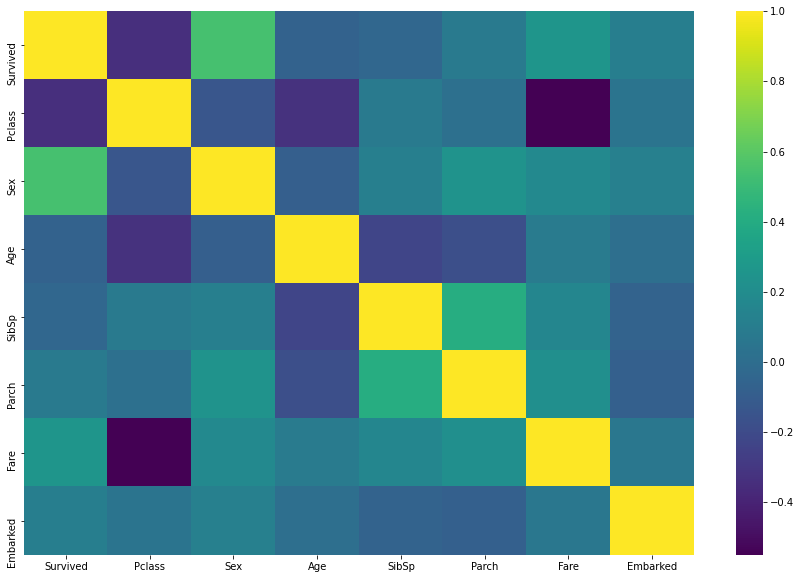

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='viridis')

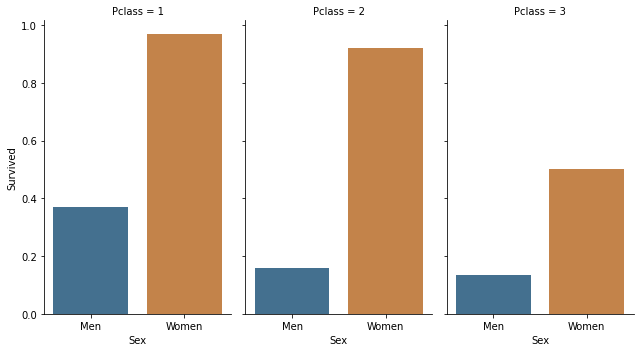

In [57]:
# Looking for survivors in based on gender
s = sns.catplot(x="Sex", y="Survived", col="Pclass",data=data, saturation=.5,kind="bar", ci=None, aspect=.6, legend=True)
s.set_xticklabels(["Men", "Women"])

### Survival rate of women are higher, they would have given preference to them while rescuing

In [16]:
# Label Encoding Categorical Columns
import category_encoders as ce

In [17]:
sex_encoder = ce.OrdinalEncoder(cols=['Sex'], return_df=True, mapping=[{'col':'Sex','mapping':{'male':0,'female':1}}])
data['Sex'] = sex_encoder.fit_transform(data['Sex'])
embark_encoder = ce.OrdinalEncoder(cols=['Embarked'], return_df=True, mapping=[{'col':'Embarked','mapping':{'S':0,'C':1,'Q':2}}])
data['Embarked'] = embark_encoder.fit_transform(data['Embarked'])

/home/hemantsah/.local/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop(['Survived'],axis=1)
y = data['Survived']

In [20]:
dt_clf= DecisionTreeClassifier()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [22]:
params = {'criterion':['gini','entropy'],
          'max_depth':range(1,10),
          'min_samples_split':range(1,10),
          'min_samples_leaf':range(1,5)
}

In [23]:
grid = GridSearchCV(dt_clf,
                   param_grid=params,
                   cv=10,
                   verbose=1,
                   n_jobs=20)


In [24]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    7.9s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:   11.2s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:   14.5s
[Parallel(n_jobs=20)]: Done 780 tasks      | elapsed:   16.7s
[Parallel(n_jobs=20)]: Done 1680 tasks      | elapsed:   21.1s
[Parallel(n_jobs=20)]: Done 2780 tasks      | elapsed:   26.6s
[Parallel(n_jobs=20)]: Done 4080 tasks      | elapsed:   33.1s
[Parallel(n_jobs=20)]: Done 5580 tasks      | elapsed:   41.0s
[Parallel(n_jobs=20)]: Done 6480 out of 6480 | elapsed:   45.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=20,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [25]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [26]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [33]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [34]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [35]:
y_pred = clf.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       182
           1       0.65      0.81      0.72        86

    accuracy                           0.80       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.82      0.80      0.80       268



In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.7985074626865671

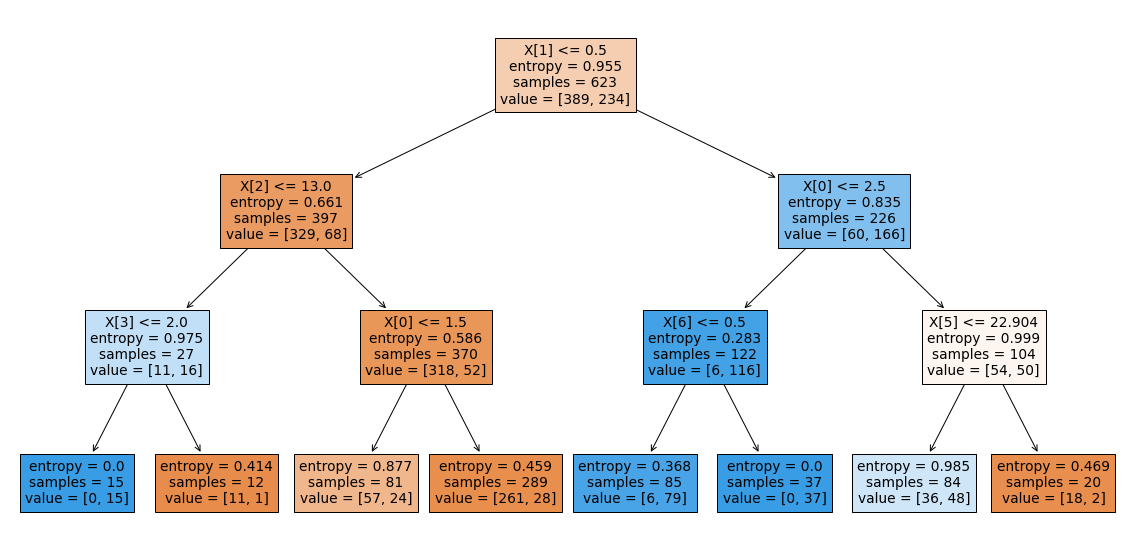

In [50]:
from sklearn import tree
plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, filled=True)